# A Statistical Analysis of Indian Movies

### Questions worth asking 

 - Basic Exploration
    - Average rating of movies
    - Average gross per movie
    - Most popular genre
    - Number of Unique Stars
    - Number of unique directors 
     
     
 - Factors affecting movie performance 
    - Is there any realtionship between gross and genre 
    - Is there any realtionship between rating and genre 
    - Is there any relationship between rating and gross 
     
     
 - Can we learn something deeper about directors 
    - How many movies were directed by each director
    - Do most directors stick to the same genres 
    - What are the popular genres for inexperienced directors
     
     
 - Can we learn something deeper about stars
      - Who are the highest grossing stars 
      - Who are the best rated stars 

In [1]:
# Setting up the environment 

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# In a notebook environment, display the plots inline
%matplotlib inline


In [2]:
# Set the style of the plots to match that used on the website
# 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
# Plot size to 14" x 7"
mpl.rc('figure', figsize = (12, 6))
# Font size to 14
mpl.rc('font', size = 14)
# Do not display top and right frame lines
#mpl.rc('axes.spines', top = False, right = False)
# Remove grid lines
#mpl.rc('axes', grid = False)
# Set backgound color to white
#mpl.rc('axes', facecolor = 'white')

# Set display precision to 4dp
pd.set_option('precision', 4)

In [3]:
# set location of the csv file contating data about the movies 
file = './hindi_movies.csv'

# load csv file into a pandas datafram 
data = pd.read_csv(file)

# view the first 5 rows of the dataframe
data.head()

,Rating,Votes,Description,Title,Gross,Director,Release,Stars,Genre,Gross (India)
0,8.7,"59,702","Biopic of Mahavir Singh Phogat, who taught wre...",Dangal,"11,151,900",Nitesh Tiwari,21-Dec-16,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh","Action,Biography,Drama,Sport",387.39
1,8.2,"106,800",P. K. is a comedy of ideas about a stranger in...,PK,"10,572,800",Rajkumar Hirani,19-Dec-14,"Aamir Khan,Anushka Sharma,Sanjay Dutt","Comedy,Drama,Fantasy,Romance,Sci-Fi",339.50
2,8.1,"51,638",A little mute girl from a Pakistan village get...,Bajrangi Bhaijaan,"7,655,452",Kabir Khan,17-Jul-15,"Salman Khan,Kareena Kapoor Khan,Nawazuddin Sid...","Action,Adventure,Comedy,Drama",320.34
3,7.2,"27,251",Sultan is a story of Sultan Ali Khan - a local...,Sultan,"6,173",Ali Abbas Zafar,6-Jul-16,"Salman Khan,Anushka Sharma,Marko Zaror","Action,Drama,Family,Romance,Sport",300.45
4,5.4,"36,496",The favourite Indian action franchise is back....,Dhoom 3,"8,031,955",Vijay Krishna Acharya,20-Dec-13,"Aamir Khan,Katrina Kaif,Abhishek Bachchan","Action,Crime,Drama,Thriller",280.25


In [4]:
# View the data type of each column 
data.iloc[0].apply(type)

Rating           <class 'numpy.float64'>
Votes                      <class 'str'>
Description                <class 'str'>
Title                      <class 'str'>
Gross                      <class 'str'>
Director                   <class 'str'>
Release                    <class 'str'>
Stars                      <class 'str'>
Genre                      <class 'str'>
Gross (India)    <class 'numpy.float64'>
Name: 0, dtype: object

## Understanding the dataset 

- **Title:** The title of the movie. 
- **Description:** A textual description or synopsis of the movie. 
- **Director:** Name of director.
- **Stars:** A comma seperated list of the lead actors starring in the movie.
- **Genre:** A comma seperated list of genres the movie belongs to. 
- **Release:** The release date of the movie in the format day-month-year.
- **Gross(India):** The box office collection of the movie in India, measured in Crore Rupees. 
- **Gross:** The box office collection of the movie in USA, measured in USD.
- **Rating:** The averae rating of the movie on IMDB. 
- **Votes:** The number of ratings the movie has received on IMDB. 

## Cleaning the dataset 
We notice that the *Votes* column is of type `string`, and it should be converted to type `integer`. However, the simple `pd.to_numeric()` will not work as the strings contain commas and therefore commas need to be removed first. The *Gross* column also suffers from the same problem and a similar cleaning and conversion procedure must be followed. 

In [5]:
# For every cell under the Votes column, replace commas with empty strings
# and save the transformed column as the new Votes column
data['Votes'] = data['Votes'].str.replace(',', '')

# Covert the values under the Votes column from string to integer
# and save it as the new Votes column
data['Votes'] = pd.to_numeric(data['Votes'])

In [6]:
# For every cell under the Gross column, replace commas with empty strings
# and save the transformed column as the new Gross column
data['Gross'] = data['Gross'].str.replace(',', '')

# Covert the values under the Gross column from string to integer
# and save it as the new Gross column
data['Gross'] = pd.to_numeric(data['Gross'])

## Exploring the dataset 
In the following section, the an exploratory analysis of the dataset has been carried out to form a better understanding of the data. 

In [7]:
# Number of movies in the dataset
data.shape[0]

5607

There is **5607** rows in the dataset and as each row represents a unique movie, there were a total of **5607** movies. 

### Understanding the **Rating**

In [8]:
# Create a dataframe of movies for which a rating is present 
movies_with_rating = data[data['Rating'].isnull() == False]

# Display the summary statistics for Rating and Votes
movies_with_rating[['Rating', 'Votes']].describe()

,Rating,Votes
count,4798.0000,4798.0000
mean,5.9485,1597.7068
std,1.3645,6843.6950
min,1.1000,5.0000
25%,5.0000,21.0000
50%,6.1000,70.0000
75%,7.0000,512.0000
max,9.0000,244050.0000


The *Rating* on IMDb is calculated as the mean of the all the ratings that a particular movie has received. The number of ratings received is *Votes* and from the analysis, it is discovered that the minimum number of *Votes* a movie has received is 5. This number is too low and therefore can produce an unfair, biased *Rating*. Thus, the only Rating that is considered valid is the one for which at least a 100 submissions have been made, i.e. Votes is greater than or equal to 100.  

In [9]:
# Only count rating for movies for which Votes is greater
# than or equal to 100
movies_with_rating = movies_with_rating[movies_with_rating['Votes'] >= 100]
movies_with_rating[['Rating', 'Votes']].describe()

,Rating,Votes
count,2141.0000,2141.0000
mean,5.9305,3542.2046
std,1.4597,9907.3546
min,1.7000,100.0000
25%,4.9000,248.0000
50%,6.1000,667.0000
75%,7.1000,2504.0000
max,8.9000,244050.0000


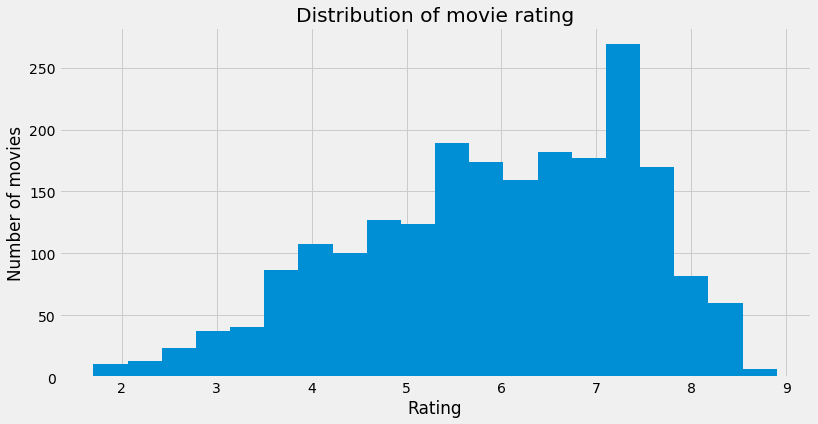

In [10]:
# Plot a histogram of movie ratings
plt.hist(movies_with_rating['Rating'].sort_values(), bins=20)
plt.title("Distribution of Movie Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.show()

The histogram clearly depicts that the distribution of ratings is **negatively skewed**. A few movies drag down the **mean** *Rating* of the dataset and therefore the **median** is used as it is a better measure of the average when distributions are skewed. 

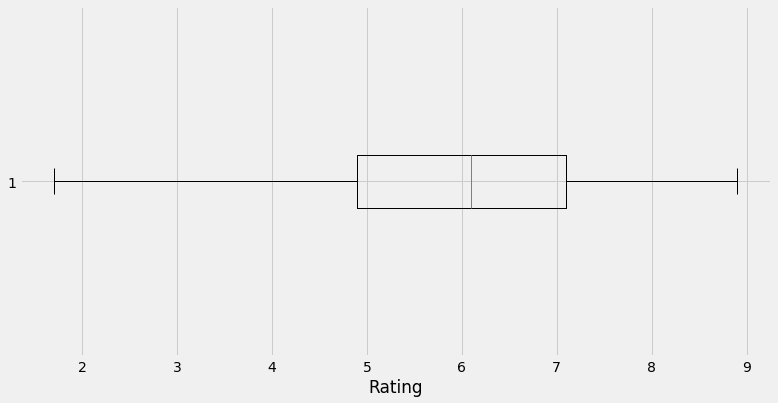

In [11]:
# Create a boxplot to show the range of ratings
plt.boxplot(movies_with_rating['Rating'], vert=False)
plt.xlabel('Rating')
plt.show()

In [54]:
print("Median: ")
movies_with_rating['Rating'].median()

Median: 


6.1

The *red* line in the boxplot shows the median which is **6.1** and there appears to be no outliers.  

### Understaing the 'Gross'

In the data set, there are two measures of box office performance. There is the *Gross* column which represents the US box office collection and the *Gross (India)* column which represents the box office collection in India. 

#### Box Office Gross (USA)

In [12]:
# Create a dataframe of movies for which Gross figure is present 
movies_with_gross = data[data['Gross'].isnull() == False]

# Display the summary statistics for Gross
movies_with_gross['Gross'].describe()

count    3.0400e+02
mean     1.0391e+06
std      1.6178e+06
min      1.9540e+03
25%      2.2052e+05
50%      5.4095e+05
75%      1.1591e+06
max      1.3877e+07
Name: Gross, dtype: float64

There are only **304** movies in the dataset for which a *Gross* value is present. 

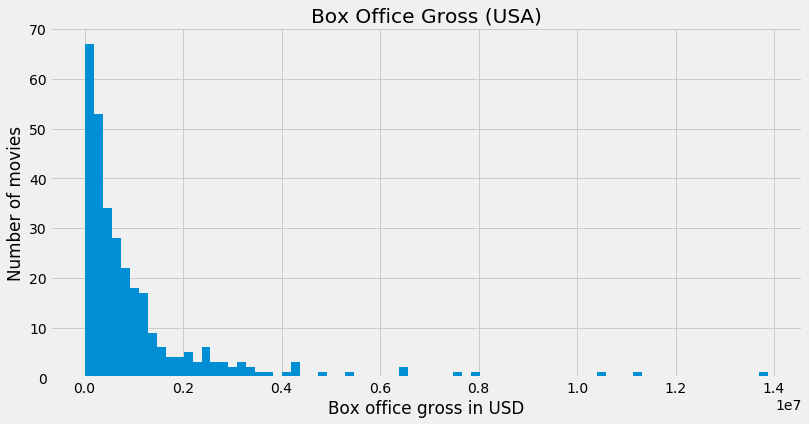

In [13]:
# Plot a histogram of US gross
plt.hist(movies_with_gross['Gross'].sort_values(), bins=76)
plt.title("Box Office Gross (USA)")
plt.xlabel("Box Office Gross in USD")
plt.ylabel("Number of Movies")
plt.show()

The distribution is heavily skewed to the right as a few movies have grossed far more than the others.

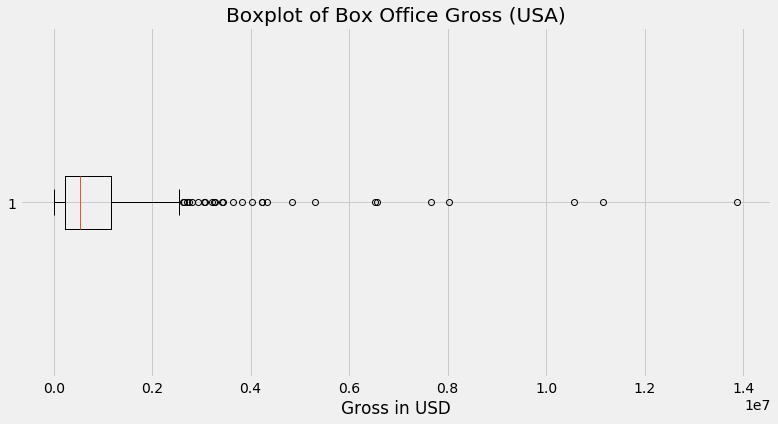

In [14]:
# Create a boxplot to show the range of US Gross
plt.boxplot(movies_with_gross['Gross'], vert=False)
plt.title('Boxplot of Box Office Gross (USA)')
plt.xlabel('Gross in USD')
plt.show()

The boxplot makes it all the more clear. The median is quite low and is much more representative of the average gross of indian movies in the US box office. However, more than a hadful of movies make far more money than the average and this is shown as the outliers on the boxplot. 

In [60]:
# Find out the outliers in the dataset 
q1 = movies_with_gross['Gross'].quantile(0.25)
q3 = movies_with_gross['Gross'].quantile(0.75)
iqr = q3 - q1
outliers = movies_with_gross.query('Gross > (@q3 + 1.5 * @iqr)')

outliers.describe()

,Rating,Votes,Gross,Gross (India)
count,28.0000,28.0000,2.8000e+01,16.0000
mean,7.0250,42729.1429,4.9290e+06,183.3106
std,1.0838,45283.7414,2.8973e+06,103.7290
min,4.7000,1558.0000,2.6339e+06,22.2100
25%,6.3250,20244.5000,3.0691e+06,109.3750
50%,7.1500,31601.5000,3.7396e+06,161.5000
75%,7.9250,46213.7500,5.6108e+06,240.0875
max,8.7000,244050.0000,1.3877e+07,387.3900


In [70]:
# Display the median value for US Gross (Outliers)
print("Median gross of all movies = {}".format(movies_with_gross['Gross'].median()))
print("Median gross of outliers = {}".format(outliers['Gross'].median()))
print("Ratio of mean gross = {}".format(outliers['Gross'].mean()/movies_with_gross['Gross'].mean()))
print("Ratio of median gross = {}".format(outliers['Gross'].median()/movies_with_gross['Gross'].median()))
print("Percentage of outliers = {}".format(outliers['Title'].count()/movies_with_gross['Title'].count() * 100))

Median gross of all movies = 540952.0
Median gross of outliers = 586028.0
Ratio of mean gross = 1.3090209822657213
Ratio of median gross = 1.0833271713571628
Percentage of outliers = 38.48684210526316


28 out of the 304 movies can be considered as outliers and mean for these outliers is **4.7** times higher whereas the median is **6.9** times higher 

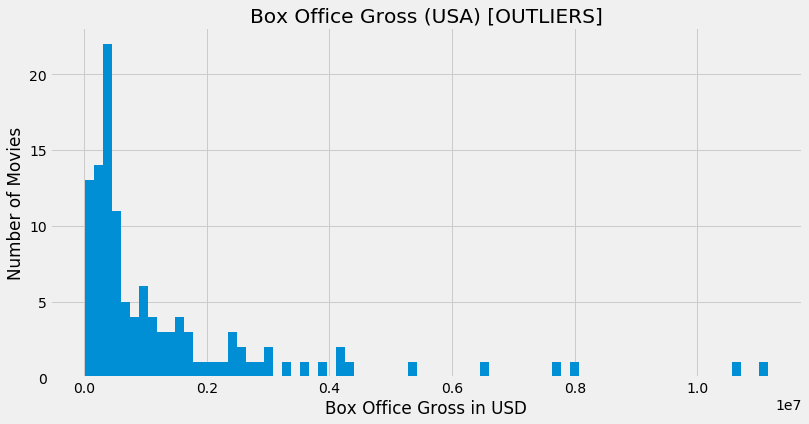

In [58]:
# Plot a histogram of US gross (Outliers)
plt.hist(outliers['Gross'].sort_values(), bins=76)
plt.title("Box Office Gross (USA) [OUTLIERS]")
plt.xlabel("Box Office Gross in USD")
plt.ylabel("Number of Movies")
plt.show()

The histogram clearly depicts a positively skewed distribution and therefore proves that there exists outliers within the outliers.

In [17]:
# Outliers within the outliers. 
print("Movies which have a US box office gross above $5 million:")
high_gross_in_us = movies_with_gross[movies_with_gross['Gross'] > 5.0e+06].sort_values('Gross', ascending=False)
high_gross_in_us.reset_index(inplace=True)
high_gross_in_us[['Title', 'Director', 'Stars', 'Rating', 'Gross', 'Gross (India)', 'Release']]

Movies which have a US box office gross above $5 million:


,Title,Director,Stars,Rating,Gross,Gross (India),Release
0,Monsoon Wedding,Mira Nair,"Naseeruddin Shah,Lillete Dubey,Shefali Shetty",7.4,1.3877e+07,NaN,26 April 2002
1,Dangal,Nitesh Tiwari,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh",8.7,1.1152e+07,387.39,21-Dec-16
2,PK,Rajkumar Hirani,"Aamir Khan,Anushka Sharma,Sanjay Dutt",8.2,1.0573e+07,339.50,19-Dec-14
3,Dhoom 3,Vijay Krishna Acharya,"Aamir Khan,Katrina Kaif,Abhishek Bachchan",5.4,8.0320e+06,280.25,20-Dec-13
4,Bajrangi Bhaijaan,Kabir Khan,"Salman Khan,Kareena Kapoor Khan,Nawazuddin Sid...",8.1,7.6555e+06,320.34,17-Jul-15
5,Bajirao Mastani,Sanjay Leela Bhansali,"Ranveer Singh,Priyanka Chopra,Deepika Padukone",7.2,6.5570e+06,184.00,18-Dec-15
6,3 Idiots,Rajkumar Hirani,"Aamir Khan,Madhavan,Mona Singh",8.4,6.5231e+06,NaN,25-Dec-09
7,Chennai Express,Rohit Shetty,"Deepika Padukone,Shah Rukh Khan,Sathyaraj",6.0,5.3067e+06,226.70,8-Aug-13


**Monsoon Weddin** is the highest grossing Indian movie in the USA followed by **Dangal** and **PK**, both Aamir Khan starrers. 

#### Box Office Gross (INDIA)

In [18]:
# Create a dataframe of movies for which Indian Gross figure is present 
movies_with_gross_india = data[data['Gross (India)'].isnull() == False]

# Display the summary statistics for Indian Gross
movies_with_gross_india['Gross (India)'].describe()

count    380.0000
mean      43.6516
std       55.0319
min        0.4000
25%        7.5000
50%       26.5350
75%       58.5400
max      387.3900
Name: Gross (India), dtype: float64

Only **380** movies are present in the dataset for which *Gross* figures in India are available.

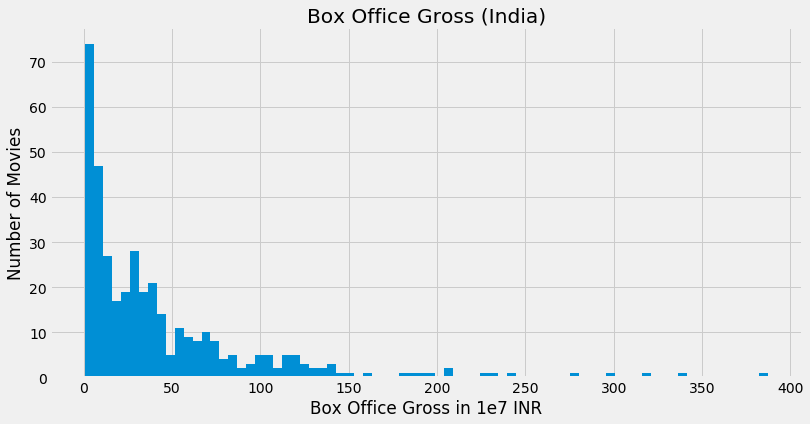

In [69]:
# Plot a histogram of Indian gross
plt.hist(movies_with_gross_india['Gross (India)'].sort_values(), bins=76)
plt.title("Box Office Gross (India)")
plt.xlabel("Box Office Gross in 1e7 INR")
plt.ylabel("Number of Movies")
plt.show()

The distirbution s **positively skewed** as a few datapoints greatly increase the average. As a result, the **median** is a better measure than the **mean**.

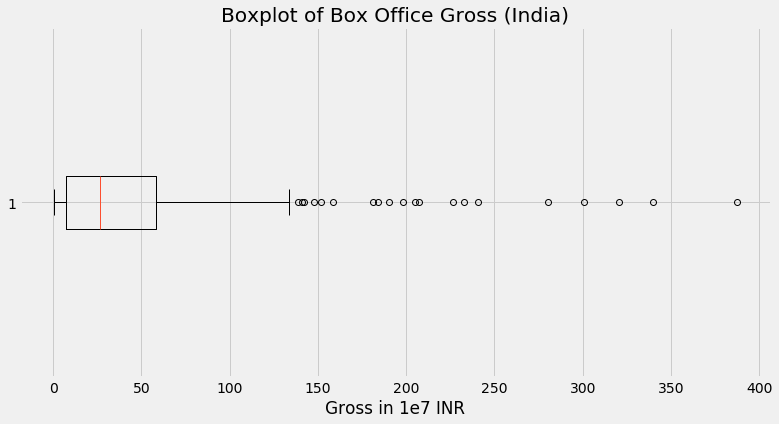

In [20]:
# Create a boxplot to show the range of Indian Gross
plt.boxplot(movies_with_gross_india['Gross (India)'], vert=False)
plt.title('Boxplot of Box Office Gross (India)')
plt.xlabel('Gross in 1e7 INR')
plt.show()

The boxplot shows that the **median** is quite low and that there exists a handful of movies whose gross figures in India are so much higher than average that they ought to be considered as outliers. 

In [63]:
# Find out the outliers in the dataset 
q1 = movies_with_gross_india['Gross (India)'].quantile(0.25)
q3 = movies_with_gross_india['Gross (India)'].quantile(0.75)
iqr = q3 - q1
outliers = movies_with_gross_india.query('Gross > (@q3 + 1.5 * @iqr)')

outliers.describe()

,Rating,Votes,Gross,Gross (India)
count,117.0000,117.0000,1.1700e+02,117.0000
mean,6.1803,14739.0684,1.3602e+06,81.6160
std,1.3186,15969.2880,1.9454e+06,73.4668
min,2.3000,324.0000,6.1080e+03,6.0000
25%,5.4000,4179.0000,3.3698e+05,30.9000
50%,6.1000,8526.0000,5.8603e+05,58.0000
75%,7.2000,19699.0000,1.5352e+06,105.5000
max,8.7000,106800.0000,1.1152e+07,387.3900


In [67]:
# Comparison of all movies versus outliers
print("Median gross of all movies = {}".format(movies_with_gross_india['Gross (India)'].median()))
print("Median gross of outliers = {}".format(outliers['Gross (India)'].median()))
print("Ratio of mean gross = {}".format(outliers['Gross (India)'].mean()/movies_with_gross_india['Gross (India)'].mean()))
print("Ratio of median gross = {}".format(outliers['Gross (India)'].median()/movies_with_gross_india['Gross (India)'].median()))
print("Percentage of outliers = {}".format(outliers['Title'].count()/movies_with_gross_india['Title'].count() * 100))

Median gross of all movies = 26.535
Median gross of outliers = 58.0
Ratio of mean gross = 1.8697143350619452
Ratio of median gross = 2.185792349726776
Percentage of outliers = 30.789473684210527


A whopping **30.8%** of the movies can be thought of as outliers and these movies have a mean that is **1.8 times** higher whereas the median is almost **2.2 times** higher. 

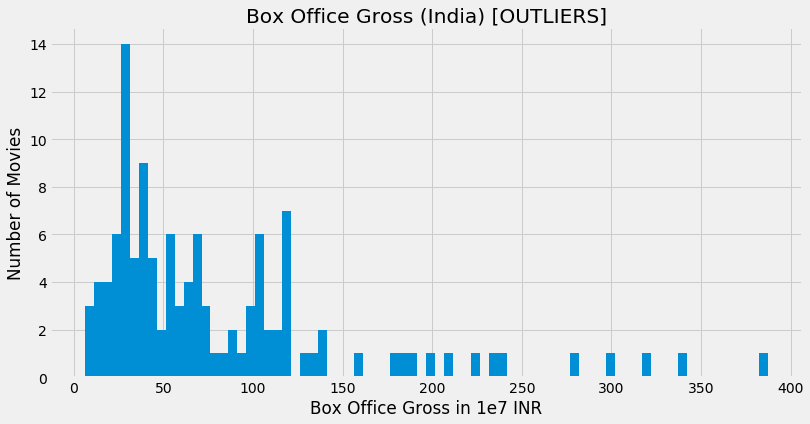

In [68]:
# Plot a histogram of Indian gross (Outliers)
plt.hist(outliers['Gross (India)'].sort_values(), bins=76)
plt.title("Box Office Gross (India) [OUTLIERS]")
plt.xlabel("Box Office Gross in 1e7 INR")
plt.ylabel("Number of Movies")
plt.show()

The ditribution is skewed to the the right and this shows that there exists outliers even within the outliers.

In [23]:
# Outliers amongst the outliers
print("Movies which have an Indian box office gross above INR 100cr:")
high_gross_in_india = movies_with_gross_india[movies_with_gross_india['Gross (India)'] > 100]
high_gross_in_india.sort_values('Gross (India)', ascending=False).reset_index(inplace=True)
high_gross_in_india[['Title', 'Director', 'Stars', 'Rating', 'Gross', 'Gross (India)', 'Release']] [:10]

Movies which have an Indian box office gross above INR 100cr:


,Title,Director,Stars,Rating,Gross,Gross (India),Release
0,Dangal,Nitesh Tiwari,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh",8.7,1.1152e+07,387.39,21-Dec-16
1,PK,Rajkumar Hirani,"Aamir Khan,Anushka Sharma,Sanjay Dutt",8.2,1.0573e+07,339.50,19-Dec-14
2,Bajrangi Bhaijaan,Kabir Khan,"Salman Khan,Kareena Kapoor Khan,Nawazuddin Sid...",8.1,7.6555e+06,320.34,17-Jul-15
3,Sultan,Ali Abbas Zafar,"Salman Khan,Anushka Sharma,Marko Zaror",7.2,6.1730e+03,300.45,6-Jul-16
4,Dhoom 3,Vijay Krishna Acharya,"Aamir Khan,Katrina Kaif,Abhishek Bachchan",5.4,8.0320e+06,280.25,20-Dec-13
5,Krrish 3,Rakesh Roshan,"Priyanka Chopra,Hrithik Roshan,Amitabh Bachchan",5.3,2.1913e+06,240.50,1-Nov-13
6,Kick,Sajid Nadiadwala,"Salman Khan,Jacqueline Fernandez,Nawazuddin Si...",5.5,2.4610e+06,233.00,25-Jul-14
7,Chennai Express,Rohit Shetty,"Deepika Padukone,Shah Rukh Khan,Sathyaraj",6.0,5.3067e+06,226.70,8-Aug-13
8,Prem Ratan Dhan Payo,Sooraj R. Barjatya,"Salman Khan,Sonam Kapoor,Neil Nitin Mukesh",4.7,4.3288e+06,207.40,12-Nov-15
9,Happy New Year,Farah Khan,"Shah Rukh Khan,Deepika Padukone,Abhishek Bachchan",5.2,NaN,205.00,24-Oct-14


10 movies have gross over **100 crore INR** with **Dangal** and **PK** leading the pack. Both are Aamir Khan starrers. 

### Most popular genre
The Genre column contains list of genres. In order to find the *single* most popular genre, the values in the genre column are seperated.

In [24]:
# Create a dataframe of moves for which a genre is present
movies_with_genre = data[data['Genre'].isnull() == False]

# Collect the unique genres into a set
unique_genres = set()
for genre in movies_with_genre['Genre'].str.split(","):
    for g in genre:
        unique_genres.add(g)

# Display the results
print("Number of unique genres: {}".format(len(unique_genres)))
print("Unique Genres: {}".format(unique_genres))

Number of unique genres: 21
Unique Genres: {'War', 'Family', 'Western', 'Biography', 'Fantasy', 'History', 'Mystery', 'Adventure', 'Animation', 'Sport', 'News', 'Music', 'Musical', 'Comedy', 'Drama', 'Romance', 'Sci-Fi', 'Thriller', 'Crime', 'Horror', 'Action'}


There are **21** unique genres that a movie in the dataset can be classified as.

In [25]:
# Group movies by their genres
movies_by_genre = dict()
genre_masks = dict()

# Creating a dictionary of masks
for genre in unique_genres:
    genre_masks[genre] = movies_with_genre['Genre'].apply(lambda x: genre in x )

# Creating a dictionary of movies with particular genre
for genre in unique_genres:
    movies_by_genre[genre] = movies_with_genre[genre_masks[genre]]
    

In [26]:
# Create a dictionary mapping of genre and number of movies
# belonging to that genre
count_of_movies_by_genre = dict()

for genre in unique_genres:
    count_of_movies_by_genre[genre] = movies_by_genre[genre]['Title'].count()

count_of_movies_by_genre = pd.Series(count_of_movies_by_genre).sort_values(ascending=False)
print("Number of movies in each genre")
print(count_of_movies_by_genre)

Number of movies in each genre
Drama        3400
Romance      1658
Action       1538
Comedy       1170
Thriller     1001
Crime         873
Family        624
Music         563
Musical       538
Adventure     286
Mystery       279
Fantasy       167
Horror        157
History       102
Biography      60
War            48
Sport          44
Animation      43
Sci-Fi         41
Western         6
News            2
dtype: int64


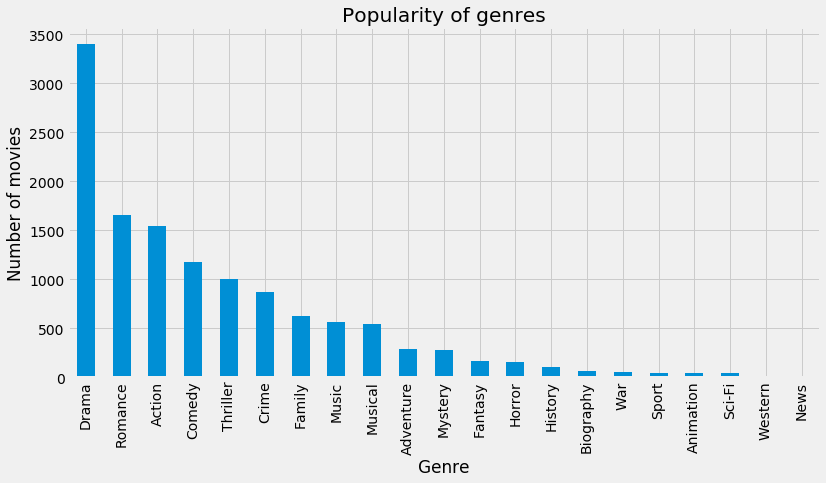

In [27]:
# Bar plot of the genres
count_of_movies_by_genre.plot.bar()
plt.title('Popularity of Genres')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.show()

**Drama** is by far the most popular genre followed by **Romance**, **Action**, and **Comedy**. **News**, **Western** and **Sci-Fi** are the least popular genres. 

In [28]:
movies_by_grouped_genres = movies_with_genre.groupby('Genre')
print("Most popular grouped genres:\n")
print(movies_by_grouped_genres.size().sort_values(ascending=False)[:10])

Most popular grouped genres:

Genre
Drama                   600
Action                  237
Drama,Romance           229
Drama,Family            203
Romance                 180
Comedy                  177
Comedy,Drama            162
Comedy,Drama,Romance    157
Action,Crime,Drama      137
Action,Drama            124
dtype: int64


As a combination, **Drama and Romance** and **Drama and Family** are the most popular.

### Number of Unique Stars


In [29]:
# Create a dataframe of movies for which stars informatin is present
movies_with_stars = data[data['Stars'].isnull() == False]

# Number of movies for which stars information is present
movies_with_stars.shape[0]

5557

There were a total of **5557** different movies for which an actor or more is named.

In [30]:
# Collect the unique stars into a set
unique_stars = set()
for stars in movies_with_stars['Stars'].str.split(","):
    for star in stars:
        unique_stars.add(star)

# Display the results
print("Number of unique stars: {}".format(len(unique_stars)))

Number of unique stars: 4042


In the dataset, there are present **4042** different actors. 

In [31]:
# Group movies by stars
movies_by_star = dict()

# Creating a dictionary of movies accessed by star
for star in unique_stars:
    movies_by_star[star] = movies_with_stars[movies_with_stars['Stars'].apply(lambda x: star in x )]

In [79]:
# Create a dictionary mapping of star and number of movies
# that the actor stared in
count_of_movies_by_star = dict()

for star in unique_stars:
    count_of_movies_by_star[star] = movies_by_star[star]['Title'].count()

count_of_movies_by_star = pd.Series(count_of_movies_by_star).sort_values(ascending=False)

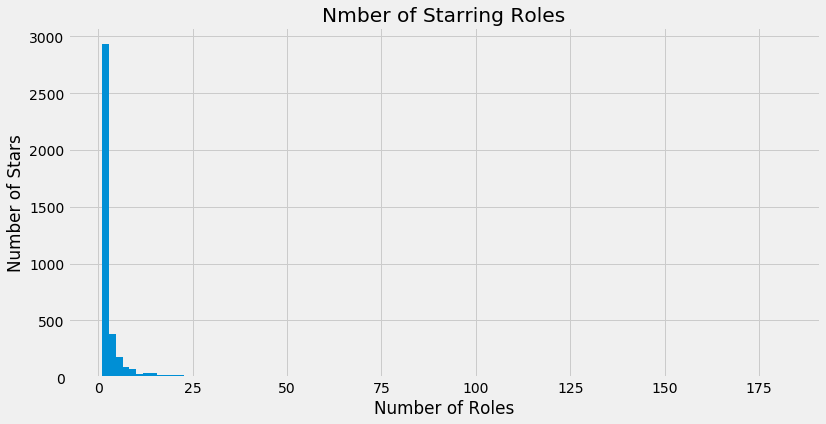

In [77]:
# Histogram of number of starring roles
plt.hist(count_of_movies_by_star, bins=100)
plt.title('Nmber of Starring Roles')
plt.ylabel('Number of Stars')
plt.xlabel('Number of Roles')
plt.show()

In [78]:
count_of_movies_by_star.median()

1.0

The disributon of starring roles is heavily skewed to the right. Most actors have starred in only 1 movie and hardly anyone has appeared in more than **25** movies.

In [80]:
# The 20 most featured actors
print("Number of movies by each star (top 20)")
count_of_movies_by_star[:20]

Number of movies by each star (top 20)


Mithun Chakraborty    182
Amit                  182
Dharmendra            162
Amitabh Bachchan      152
Jeetendra             137
Ashok Kumar           128
Rekha                 125
Rajesh Khanna         123
Sanjay Dutt           115
Akshay Kumar          114
Chand                 112
Vinod Khanna          102
Arun                  101
Ajay                   98
Shashi Kapoor          97
Govinda                95
Raj Babbar             94
Madhu                  94
Rishi Kapoor           93
Jackie Shroff          93
dtype: int64

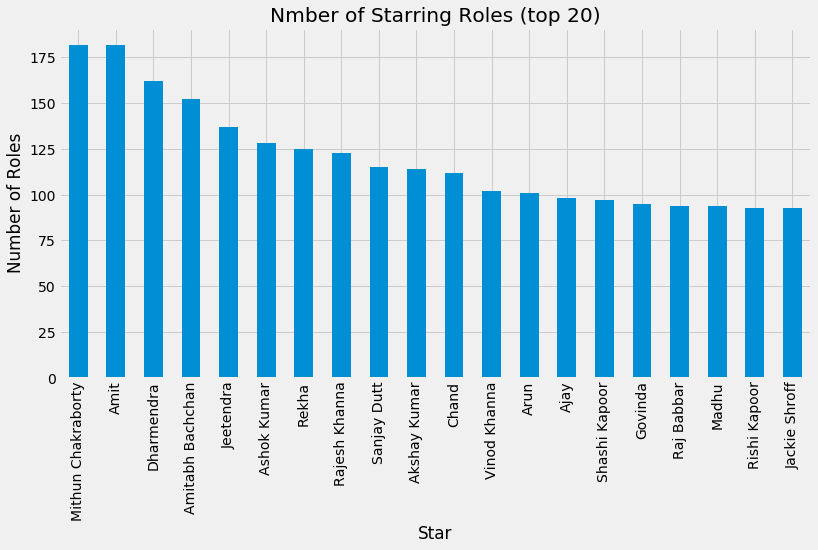

In [81]:
# Plot of the 20 stars with the highest number of roles
count_of_movies_by_star[:20].plot.bar()
plt.title('Nmber of Starring Roles (top 20)')
plt.ylabel('Number of Roles')
plt.xlabel('Star')
plt.show()

In stark contrast to the average, the 20 most featured actors have starred in 93 or more movies. The most featured actor in the dataset, **Mithud Chakraborty** has starred in an astounding **182** movies. This illustrates that although quite a few actors get a chance to star in a movie, not many get a second chance and fewer still have staying power and longetivity. 

### Number of unique directors 

In [35]:
# Create a dataframe consisting of moies for which 
# name of director is present 
movies_with_director = data[(data['Director'].isnull() == False)]

# Group movies by unique direcotrs 
movies_by_director = movies_with_director.groupby('Director').size().sort_values(ascending=False)

movies_by_director.head()

Director
[]                      59
David Dhawan            43
Mahesh Bhatt            38
Hrishikesh Mukherjee    35
Rama Rao Tatineni       34
dtype: int64

In [36]:
# '[]' is not a valid value for director and therefore  will be ignored
movies_by_director = movies_by_director.drop(labels='[]', axis='index')

In [37]:
print('Number of unique directors: {}'.format(movies_by_director.size))
print('Director with the highest number of movies: {}'.format(movies_by_director.index[0]))
print('Maximum number of movies directed: {}'.format(movies_by_director.iloc[0]))

Number of unique directors: 2163
Director with the highest number of movies: David Dhawan
Maximum number of movies directed: 43


In the dataset, there are **2163** different directors, and amongst them **David Dhawan** is the one who has directed the highest number of movies with **43** films to his credit.

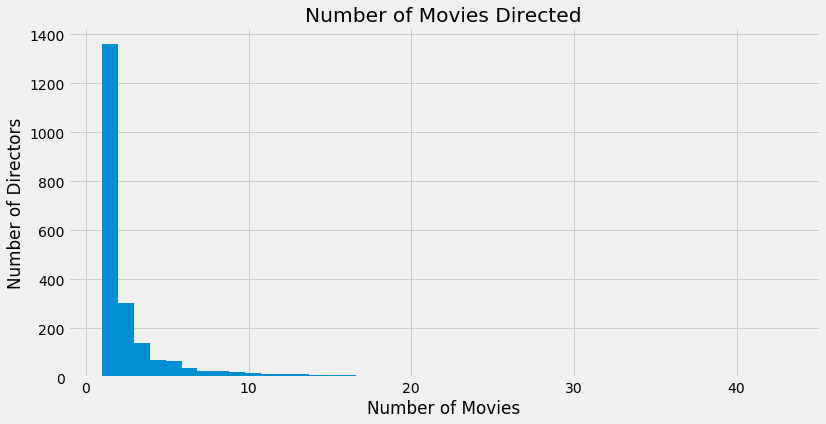

In [83]:
# Histogram of movies directed
plt.hist(movies_by_director, bins=43)
plt.title("Number of Movies Directed")
plt.xlabel("Number of Movies")
plt.ylabel("Number of Directors")
plt.show()

In [84]:
movies_by_director.median()

1.0

In [39]:
movies_by_director.describe()

count    2163.000
mean        2.565
std         3.781
min         1.000
25%         1.000
50%         1.000
75%         2.000
max        43.000
dtype: float64

The distribution for movies directed is also skewed to the right due to a small number of directors directing a large number of movies. Most directors, like actors only get one chance and they end up directing only one movie. Few direct a second or a third film and fewer still go on to direct more. 

## Factors afffecting the performance of movies

**Measure of Performance:** The performance of a movie can be measured either in terms of box-office revenue (Commercial success) or rating (Critical Success). Since the rating is an average rating given by IMDb users, it is not an accurate measure of critical success, however, it is an indication of the popular opionion of a movie. 

The questions that this sections aims to answer are: 

- Is there any realtionship between gross and genre?
- Is there any realtionship between rating and genre?
- Is there any relationship between rating and gross? 

#### Is there any relationship between gross and genre?
A relationship between gross and genre can dpecit many things. If one exists, then it can be hypothised that certain enres are more loved by the audience than others. 

In [85]:
# Creating a dictionary of masks
genre_masks = dict()
for genre in unique_genres:
    genre_masks[genre] = movies_with_gross['Genre'].apply(lambda x: genre in x )

# Dictionary to arrange movies by genre
movies_with_gross_by_genre = dict()

# DataFrame to hold summary statistics for US Gross for each genre 
us_gross_by_genre = pd.DataFrame(index=count_of_movies_by_genre.index, columns=['Total', 'Mean', 'Median', 'STD'])

# Populate dictionary and DataFrame with values
for genre in unique_genres:
    movies_with_gross_by_genre[genre]      = movies_with_gross[genre_masks[genre]]
    us_gross_by_genre.loc[genre]['Total']  = movies_with_gross_by_genre[genre]['Gross'].sum()
    us_gross_by_genre.loc[genre]['Mean']   = movies_with_gross_by_genre[genre]['Gross'].mean()  
    us_gross_by_genre.loc[genre]['Median'] = movies_with_gross_by_genre[genre]['Gross'].median() 
    
    # As this is a sample, Bessel's correction will be applied 
    us_gross_by_genre.loc[genre]['STD']    = movies_with_gross_by_genre[genre]['Gross'].std(ddof=0)
    

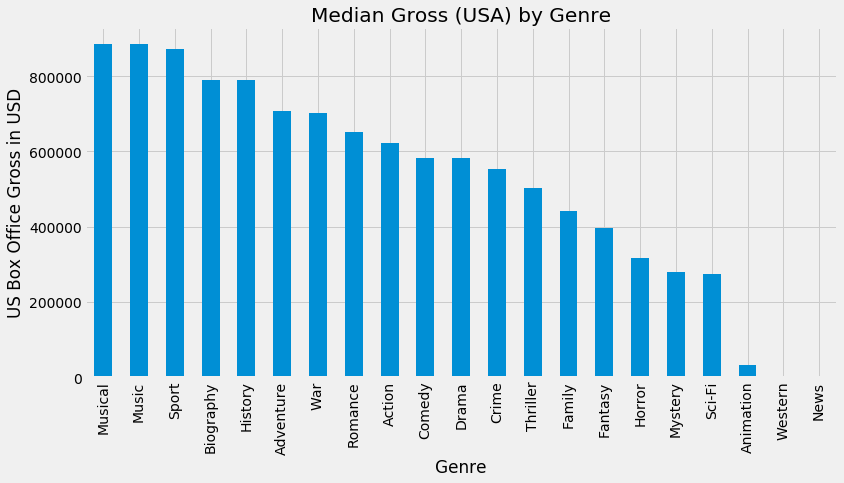

In [86]:
# Plot of Median US Gross by Genre
us_gross_by_genre['Median'].sort_values(ascending=False).plot.bar()
plt.title('Median Gross (USA) by Genre')
plt.xlabel('Genre')
plt.ylabel('US Box Office Gross in USD')
plt.show()

As the distribution of US box office gross is a skewed one, median is a better measure of average than the mean and therefore  a chart showing the relationship between genre and median gross has been created. There does appear to be a correlation between genre and US gross. The most popular genre, **Drama** has earnings whihc put in the middle of the pack whereas **Musical**, **Music** and **Sport** all post strong earnings. **Horor**, **Mystery**, **Sci-Fi** and **Animation** are ppor performers. **News** and **Western** do not have any data to show and thus are not counted. 

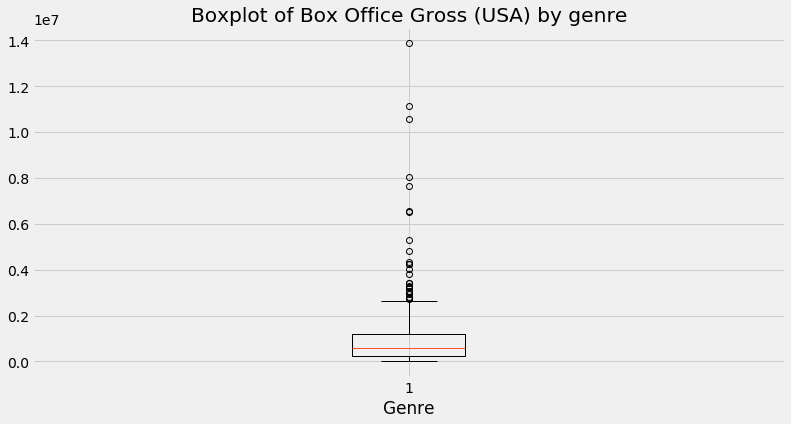

In [41]:
### CHART INCORRECT: NEEDS TO BE FIXED OR REMOVED
# Dictionary to hold US gross figures by genre
us_gross_by_genre = dict()

for genre in unique_genres:
    us_gross_by_genre[genre] = movies_with_gross_by_genre[genre]['Gross']
    
us_gross_by_genre = pd.DataFrame.from_dict(us_gross_by_genre)

# Create a boxplot to show the range of US Gross
plt.boxplot(us_gross_by_genre['Drama'].dropna(axis='index'))
plt.title('Boxplot of Box Office Gross (USA) by genre')
plt.xlabel('Genre')
plt.show()

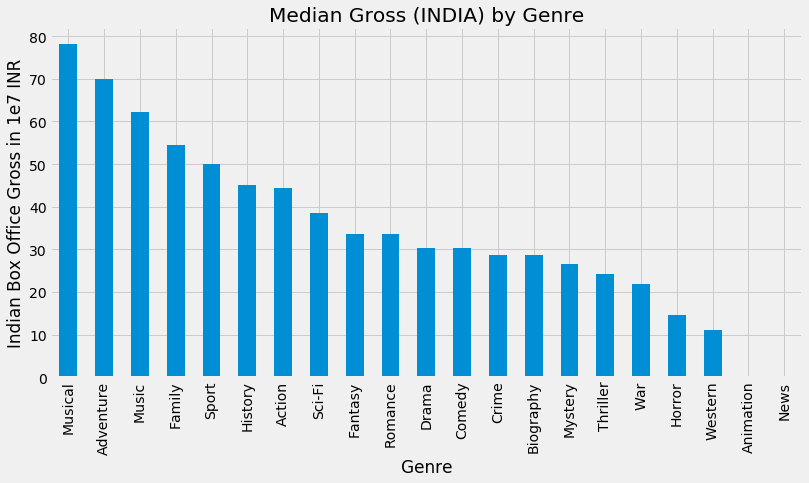

In [42]:
# Creating a dictionary of masks
genre_masks = dict()
for genre in unique_genres:
    genre_masks[genre] = movies_with_gross_india['Genre'].apply(lambda x: genre in str(x))


# Dictionary to arrange movies by genre
movies_with_gross_india_by_genre = dict()

# DataFrame to hold summary statistics for Indian Gross for each genre 
indian_gross_by_genre = pd.DataFrame(index=count_of_movies_by_genre.index, columns=['Total', 'Mean', 'Median', 'STD'])

# Populate dictionary and DataFrame with values
for genre in unique_genres:
    movies_with_gross_india_by_genre[genre]    = movies_with_gross_india[genre_masks[genre]]
    indian_gross_by_genre.loc[genre]['Total']  = movies_with_gross_india_by_genre[genre]['Gross (India)'].sum()
    indian_gross_by_genre.loc[genre]['Mean']   = movies_with_gross_india_by_genre[genre]['Gross (India)'].mean()  
    indian_gross_by_genre.loc[genre]['Median'] = movies_with_gross_india_by_genre[genre]['Gross (India)'].median() 
    
    # As this is a sample, Bessel's correction will be applied 
    indian_gross_by_genre.loc[genre]['STD']    = movies_with_gross_india_by_genre[genre]['Gross (India)'].std()
    

# Plot of Median Indian Gross by Genre
indian_gross_by_genre['Median'].sort_values(ascending=False).plot.bar()
plt.title('Median Gross (INDIA) by Genre')
plt.xlabel('Genre')
plt.ylabel('Indian Box Office Gross in 1e7 INR')
plt.show()

In India, the relatiohship is different. **Musical** is once again the highest grossing genre just like in the USA but **Family** films earn much more in India then in the US. Even in India, **Horror** is terrible performer along with **Western**.

#### Is there any relationship between rating and genre?
If a relationship between rating and genre exists, then it can potentially illustrate two things. Either some genres are just more well liked by audiences to warrant a higher rating, or some movies of certain genres are more well made than others. 

In [87]:
# Creating a dictionary of masks
genre_masks = dict()
for genre in unique_genres:
    genre_masks[genre] = movies_with_rating['Genre'].apply(lambda x: genre in str(x))


movies_with_rating_by_genre = dict()
rating_by_genre             = pd.DataFrame(index=count_of_movies_by_genre.index, columns=['Mean', 'Median', 'STD'])

for genre in unique_genres:
    movies_with_rating_by_genre[genre]  = movies_with_rating[genre_masks[genre]]
    rating_by_genre.loc[genre]['Mean']             = movies_with_rating_by_genre[genre]['Rating'].mean()
    rating_by_genre.loc[genre]['Median']           = movies_with_rating_by_genre[genre]['Rating'].median()
    rating_by_genre.loc[genre]['STD']              = movies_with_rating_by_genre[genre]['Rating'].std()
                   

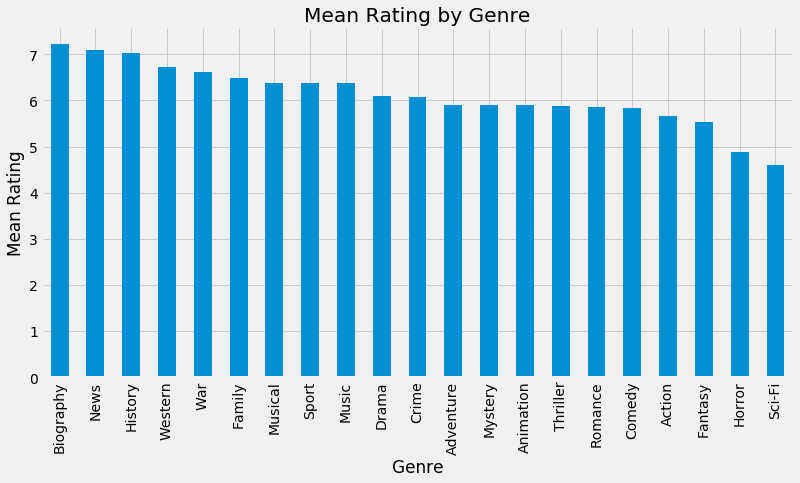

In [88]:
# Plot of Mean Rating of movies in each genre 
rating_by_genre['Mean'].sort_values(ascending=False).plot.bar()
plt.title('Mean Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.show()       

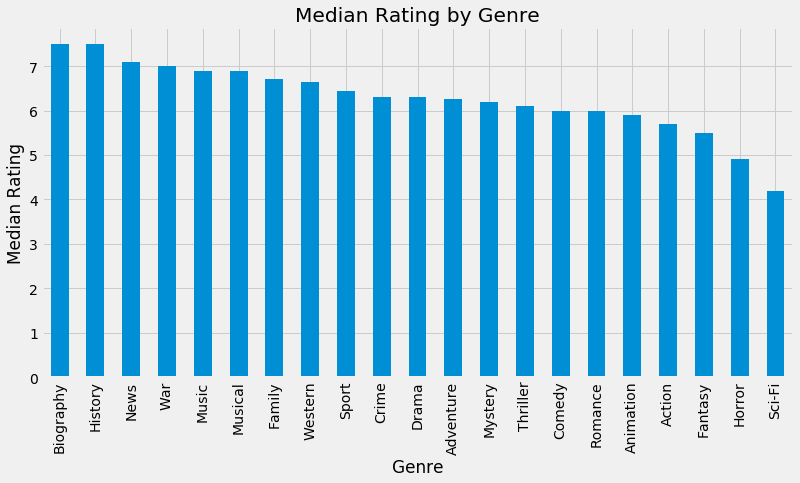

In [44]:
# Plot of Mean Rating of movies in each genre 
rating_by_genre['Median'].sort_values(ascending=False).plot.bar()
plt.title('Median Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Median Rating')
plt.show()                          

The median is used to gauge the relationship between rating and genre as the orignal distribution is skewed making the median more preferable to the mean. A correlation does exist with **Biographies** and **History** having a higher median rating than other genres whereas **Horror** and **Sci-Fi** have the lowest median rating. One reason for this could be that most, but certainly not all horror and science-fiction movies are made to be a fun watch rather than a thought provoking one. 

#### Is there any relationship between rating and gross?
If a movie were to receive a high rating, then will it also make money in the box office? Can a movie be terrible but still make a lot of money? While filmakers probably have a good answer to these questions, a concrete answer can perhaps be derived through analysis of data. This section tries to showcase the relationship between rating and gross if any exist.

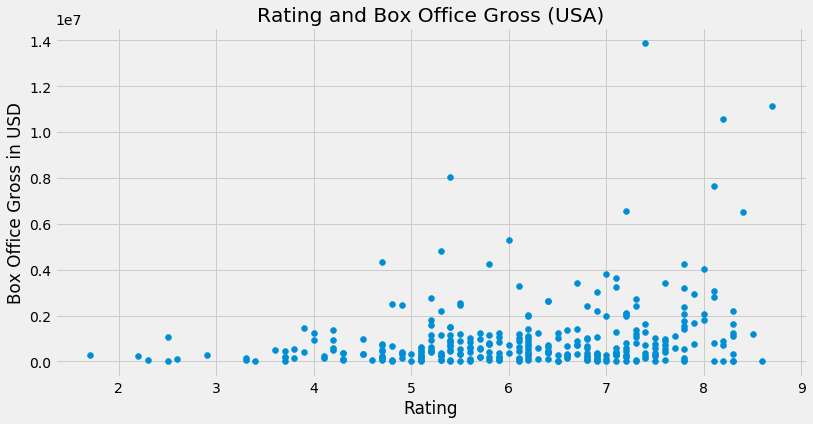

In [45]:
# movies_with_gross already contains set of movies with both box office figures and rating
plt.scatter(movies_with_gross['Rating'], movies_with_gross['Gross'])
plt.title('Rating and Box Office Gross (USA)')
plt.xlabel('Rating')
plt.ylabel('Box Office Gross in USD')
plt.show()

The scatterplot shows that there exists a weak correlation between Rating and box office gross in the USA. The highest grossing movies do have a higher than average rating but not by much. 

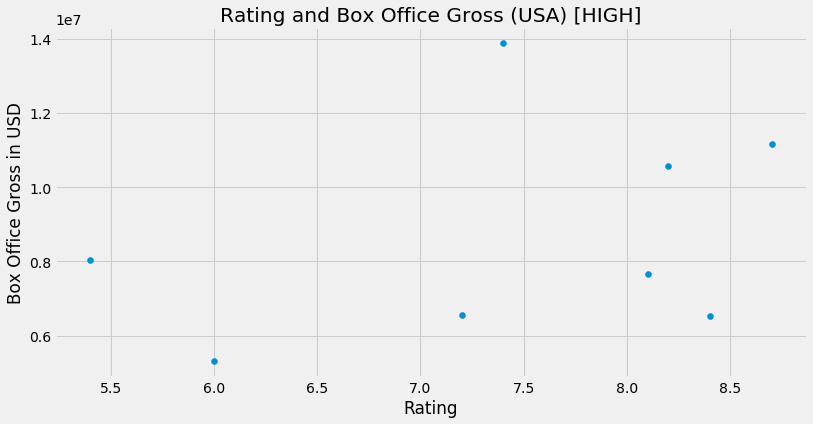

In [46]:
# high performers in US
plt.scatter(high_gross_in_us['Rating'], high_gross_in_us['Gross'])
plt.title('Rating and Box Office Gross (USA) [HIGH]')
plt.xlabel('Rating')
plt.ylabel('Box Office Gross in USD')
plt.show()

When taking into account the highest performers, the rating is all over the place and even a weak correlation cannot be ascertained. While two moves have a rating below the median, they are still better than the lowest rating received.

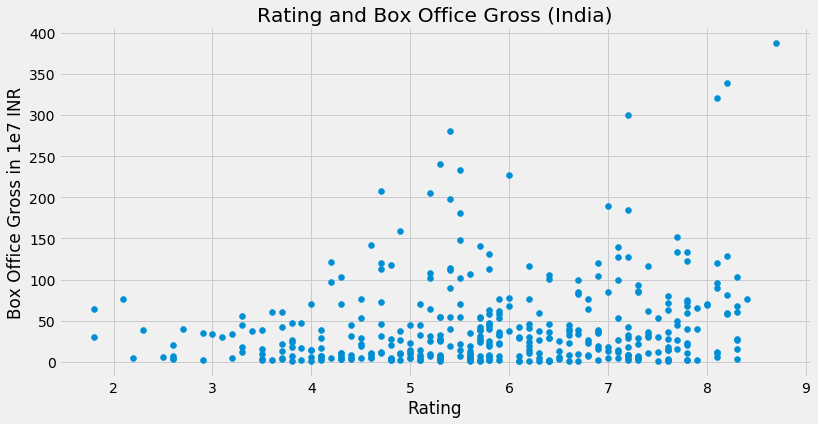

In [47]:
# movies_with_gross_india already contains set of movies with both box office figures and rating
plt.scatter(movies_with_gross_india['Rating'], movies_with_gross_india['Gross (India)'])
plt.title('Rating and Box Office Gross (India)')
plt.xlabel('Rating')
plt.ylabel('Box Office Gross in 1e7 INR')
plt.show()

In India, there appears to be a stronger correlation between rating and box office gross. The highest rated movie also happens to be the highest grossing. 

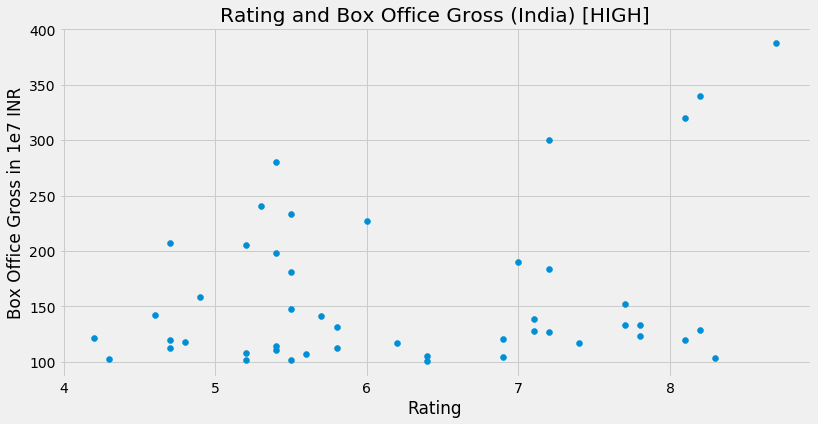

In [48]:
# movies_with_gross_india already contains set of movies with both box office figures and rating
plt.scatter(high_gross_in_india['Rating'], high_gross_in_india['Gross (India)'])
plt.title('Rating and Box Office Gross (India) [HIGH]')
plt.xlabel('Rating')
plt.ylabel('Box Office Gross in 1e7 INR')
plt.show()

The correlation is still present when only considering the high grossing movies. There does not appear to be a cutoff point and even movies with very low raitngs can and have made above 100 Crore INR. On the other hand, there are movies with above average ratings which perform worse in the box office than their lower rated counterpart. However, the three highest grossing movies are also the highest rated and this shows that even though it is far from a determining factor of box office performance, it does play a part.

### Do most directors stick to the same genres

In [49]:
# Only have a dataframe of moview where both director and genre information are present
movies_with_director_and_genre = movies_with_director[movies_with_director['Genre'].isnull() == False]

# Convert genre column into a tuple
movies_with_director_and_genre['Genre'] = movies_with_director_and_genre['Genre'].str.split(',').apply(tuple)

# Only include directors with more than 3 movies
director_and_genre = movies_with_director_and_genre.groupby('Director')

director_and_genre = director_and_genre.filter(lambda x: len(x) > 3).groupby('Director')

# Create series of directors and the number of unique genres they have worked with
director_and_genre_series = director_and_genre['Genre'].aggregate(np.sum).apply(lambda x: len(set(x)))

director_and_genre_series.describe()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


count    327.0000
mean       7.0520
std        2.1693
min        2.0000
25%        6.0000
50%        7.0000
75%        9.0000
max       12.0000
Name: Genre, dtype: float64

Only **327** directors have directed more than 3 movies. The mean number of genres that they have worked with is **7**. Every director with credits for 4 or more movies has worked with atleast two different genres. 

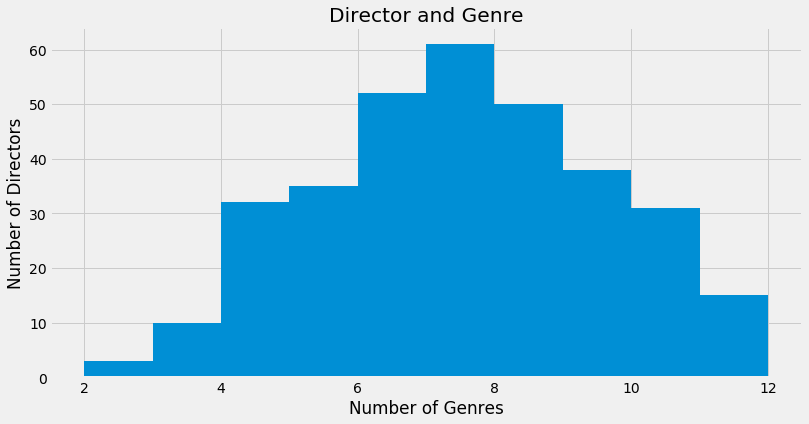

In [50]:
# Histogram of movies
plt.hist(director_and_genre_series)
plt.title('Director and Genre')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Directors')
plt.show()

The distribution for number of genres by directors is a normal distribution and therefore the values of mean, median and mode are roughly equal 

### What are the popular genres for directors just starting out

In [89]:
# Group movies with genre information by director
director_and_genre = movies_with_director_and_genre.groupby('Director')

# Only include directors with 3 movies or less
director_and_genre = director_and_genre.filter(lambda x: len(x) <= 3).groupby('Director')

# Convert genre column into a tuple
director_and_genre_series = director_and_genre['Genre'].aggregate(np.sum).apply(lambda x: tuple(set(x)))

# Create dictionary for storage 
count_of_movies_by_genre_starters = dict()

# Count the number of unique genres for each director
for genre in unique_genres:
    count_of_movies_by_genre_starters[genre] = director_and_genre_series.apply(lambda x: genre in x).sum()

# Convert to ordered series
count_of_movies_by_genre_starters = pd.Series(count_of_movies_by_genre_starters).sort_values(ascending=False)

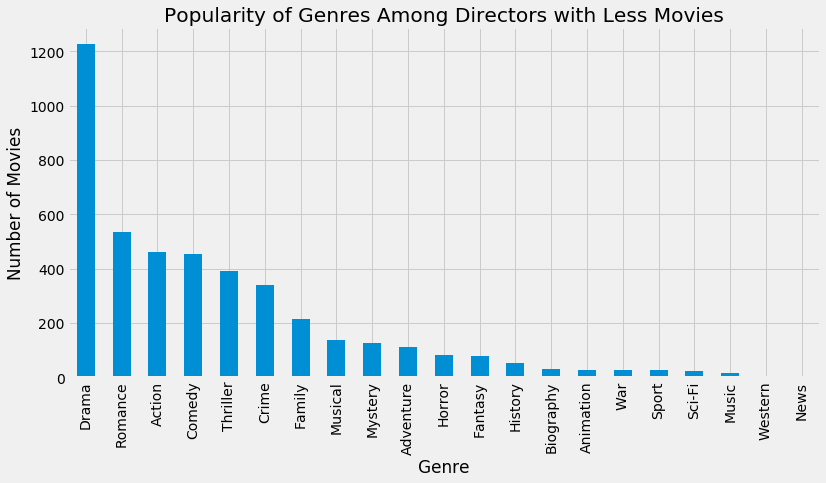

In [92]:
# Popular genres for beginner directors 
count_of_movies_by_genre_starters.plot.bar()
plt.title('Popularity of Genres Among Directors with Less Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

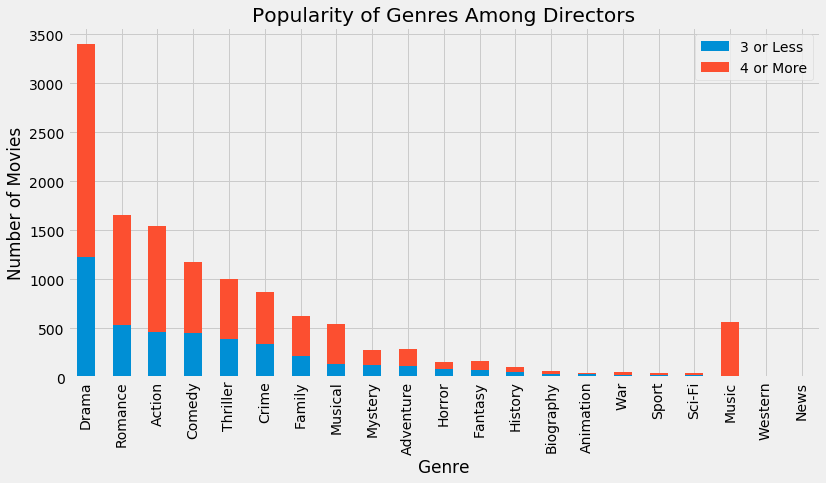

In [93]:
# Comparison of genre preference amongst directors with more and less movies
compare_movie_count_by_genre = pd.Series.to_frame(count_of_movies_by_genre_starters)
compare_movie_count_by_genre['4 or More'] = pd.Series(count_of_movies_by_genre) - compare_movie_count_by_genre[0]
compare_movie_count_by_genre.rename(columns={0:'3 or Less'}, inplace=True)
compare_movie_count_by_genre.sort_values(by='3 or Less', ascending=False).plot.bar(stacked=True)
plt.title('Popularity of Genres Among Directors')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

**Drama** is the genre of choice for most directors. **Music** is the genre where directors who have been in charge of 4 or movies tend to direct far more than the directors who halve helmed 3 movies or less. 

### Who are the highest grossing stars

    -Highest overall gross in USA
    -Highest overall gross in INDIA
    -Mean/Median Gross in USA
    -Mean/Median Gross in USA

### Who are the best rated stars

    -Average Rating of each star 

In [99]:
# Create a set to hold actors
stars_with_gross = set()

for stars in movies_with_gross['Stars'].str.split(','):
    for star in stars:
        stars_with_gross.add(star)
        
print("Number of unique stars in movies_with_gross: {}".format(len(stars_with_gross)))

Number of stars in movies_with_gross: 341


There are **341** different stars for whom their movie gross figure is available.

In [101]:
movies_with_gross_by_star = dict()
movies_with_gross_by_established_star = dict()

# movies_with_gross_by_establsihed_star only includes stars who have been involved
# in atleast 3 movies in order to account for one hit wonders

for star in stars_with_gross:
    movies_with_gross_by_star[star] = movies_with_gross[movies_with_gross['Stars'].apply(lambda stars: star in stars)]
    if movies_with_gross_by_star[star]['Title'].count() > 2:
        movies_with_gross_by_established_star[star] = movies_with_gross_by_star[star]

print("Number of established stars: {}".format(len(movies_with_gross_by_established_star)))

Number of established stars: 79


There are **79** different actors who have starred in at least 3 movies and the US box office gross figure for those movies are available. 

In [112]:
# A dataframe to hold the gross figures of each actor. 
gross_by_star = pd.DataFrame(index=list(stars_with_gross), columns=['Total', 'Mean', 'Median', 'STD'])

for star in stars_with_gross:
    gross_by_star.loc[star]['Total']  = movies_with_gross_by_star[star]['Gross'].sum()
    gross_by_star.loc[star]['Mean']   = movies_with_gross_by_star[star]['Gross'].mean()
    gross_by_star.loc[star]['Median'] = movies_with_gross_by_star[star]['Gross'].median()
    gross_by_star.loc[star]['STD']    = movies_with_gross_by_star[star]['Gross'].std()
             
gross_by_star.head()

,Total,Mean,Median,STD
Ayesha Takia,4.673e+04,4.673e+04,4.673e+04,NaN
Kabir Bedi,1.251e+06,1.251e+06,1.251e+06,NaN
Hemendra Dandotiya,3.957e+04,3.957e+04,3.957e+04,NaN
Sridevi,1.671e+06,1.671e+06,1.671e+06,NaN
Chandrachur Singh,4.263e+05,4.263e+05,4.263e+05,NaN


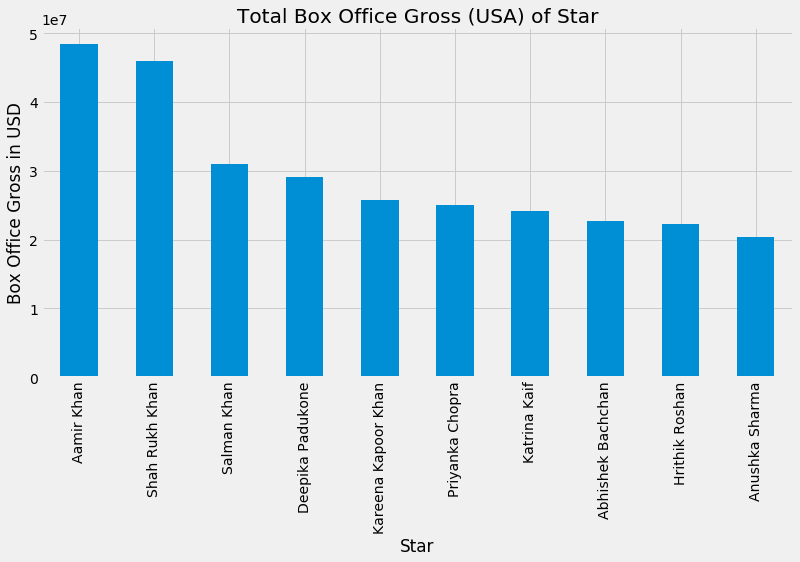

In [118]:
# Total Gross in US
gross_by_star['Total'].sort_values(ascending=False)[:10].plot.bar()
plt.title('Total Box Office Gross (USA) of Star')
plt.xlabel('Star')
plt.ylabel('Box Office Gross in USD')
plt.show()

**Aamir Khan** has the highest total box office gross in the US followed by **Shah Rukh Khan**.

In [133]:
# A dataframe to hold the gross figures of each actor. 
gross_by_established_star = pd.DataFrame(index=list(movies_with_gross_by_established_star.keys()), columns=['Total', 'Mean', 'Median', 'STD'])

for star in list(movies_with_gross_by_established_star.keys()):
    gross_by_established_star.loc[star]['Total']  = movies_with_gross_by_established_star[star]['Gross'].sum()
    gross_by_established_star.loc[star]['Mean']   = movies_with_gross_by_established_star[star]['Gross'].mean()
    gross_by_established_star.loc[star]['Median'] = movies_with_gross_by_established_star[star]['Gross'].median()
    gross_by_established_star.loc[star]['STD']    = movies_with_gross_by_established_star[star]['Gross'].std()
             
gross_by_established_star.head()

,Total,Mean,Median,STD
Pavan Malhotra,4.206e+06,1.402e+06,1.626e+06,1.271e+06
Mithun Chakraborty,3.719e+06,1.24e+06,1.132e+06,7.991e+05
Ranveer Singh,9.566e+06,3.189e+06,2.634e+06,3.128e+06
Karisma Kapoor,2.747e+06,9.157e+05,6.11e+05,9.734e+05
Vidya Balan,4.55e+06,4.55e+05,3.594e+05,2.912e+05


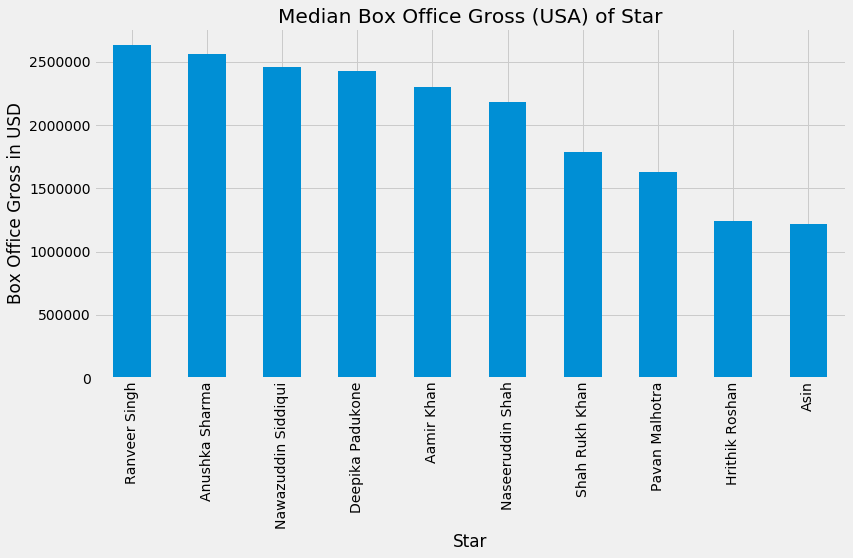

In [135]:
# Median Gross in US
gross_by_established_star['Median'].sort_values(ascending=False)[:10].plot.bar()
plt.title('Median Box Office Gross (USA) of Star')
plt.xlabel('Star')
plt.ylabel('Box Office Gross in USD')
plt.show()

#### INDIA

In [182]:
# Remove movie for which stars is empty
movies_with_gross_india = movies_with_gross_india[movies_with_gross_india['Stars'].isnull() == False]

# Create a set to hold actors
stars_with_gross_india = set()

for stars in movies_with_gross_india['Stars'].str.split(','):
    for star in stars:
        stars_with_gross_india.add(star)
        
print("Number of unique stars in movies_with_gross_india: {}".format(len(stars_with_gross_india)))


Number of unique stars in movies_with_gross_india: 545


There are **545** different stars for whom their movie gross figure is available.


In [183]:
movies_with_gross_by_star_india = dict()
movies_with_gross_by_established_star_india = dict()

# movies_with_gross_by_establsihed_star only includes stars who have been involved
# in atleast 3 movies in order to account for one hit wonders

for star in stars_with_gross_india:
    movies_with_gross_by_star_india[star] = movies_with_gross_india[movies_with_gross_india['Stars'].apply(lambda stars: star in stars)]
    if movies_with_gross_by_star_india[star]['Title'].count() > 2:
        movies_with_gross_by_established_star_india[star] = movies_with_gross_by_star_india[star]

print("Number of established stars: {}".format(len(movies_with_gross_by_established_star_india)))

Number of established stars: 109


There are **109** different actors who have starred in at least 3 movies and the Indian box office gross figure for those movies are available. 

In [185]:
# A dataframe to hold the gross figures of each actor. 
gross_by_star_india = pd.DataFrame(index=list(stars_with_gross_india), columns=['Total', 'Mean', 'Median', 'STD'])

for star in stars_with_gross_india:
    gross_by_star_india.loc[star]['Total']  = movies_with_gross_by_star_india[star]['Gross (India)'].sum()
    gross_by_star_india.loc[star]['Mean']   = movies_with_gross_by_star_india[star]['Gross (India)'].mean()
    gross_by_star_india.loc[star]['Median'] = movies_with_gross_by_star_india[star]['Gross (India)'].median()
    gross_by_star_india.loc[star]['STD']    = movies_with_gross_by_star_india[star]['Gross (India)'].std()
             
gross_by_star_india.head()

,Total,Mean,Median,STD
Rhea Chakraborty,19.8,9.9,9.9,3.677
Vikram Singh,10.82,5.41,5.41,3.663
Kabir Bedi,58,58,58,NaN
Hemendra Dandotiya,34.09,17.05,17.05,2.765
Sridevi,75.96,37.98,37.98,2.857


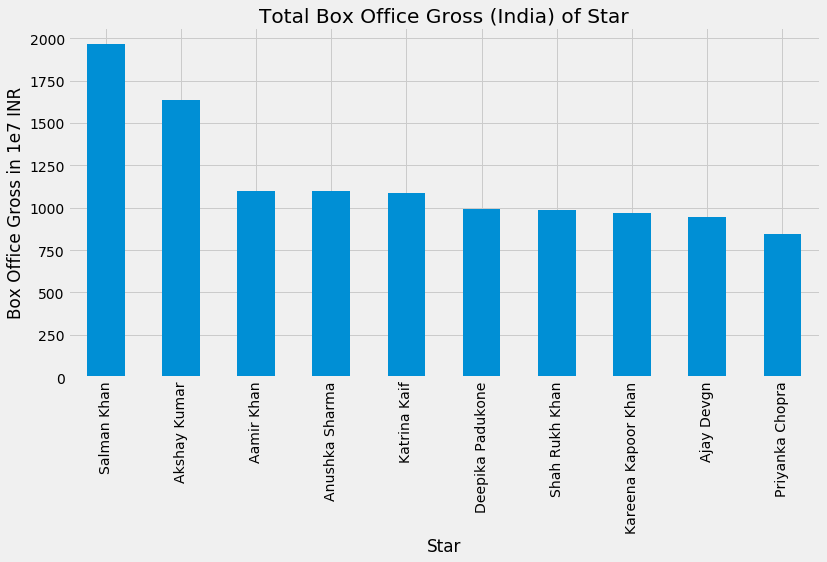

In [186]:
# Total Gross in India
gross_by_star_india['Total'].sort_values(ascending=False)[:10].plot.bar()
plt.title('Total Box Office Gross (India) of Star')
plt.xlabel('Star')
plt.ylabel('Box Office Gross in 1e7 INR')
plt.show()

**Salman Khan** has the highest total gross in India followed by **Akshay Kumar**

In [188]:
# A dataframe to hold the gross figures of each actor. 
gross_by_established_star_india = pd.DataFrame(index=list(movies_with_gross_by_established_star_india.keys()), columns=['Total', 'Mean', 'Median', 'STD'])

for star in list(movies_with_gross_by_established_star_india.keys()):
    gross_by_established_star_india.loc[star]['Total']  = movies_with_gross_by_established_star_india[star]['Gross (India)'].sum()
    gross_by_established_star_india.loc[star]['Mean']   = movies_with_gross_by_established_star_india[star]['Gross (India)'].mean()
    gross_by_established_star_india.loc[star]['Median'] = movies_with_gross_by_established_star_india[star]['Gross (India)'].median()
    gross_by_established_star_india.loc[star]['STD']    = movies_with_gross_by_established_star_india[star]['Gross (India)'].std()
             
gross_by_established_star_india.head()

,Total,Mean,Median,STD
Tiger Shroff,126.7,42.24,38.61,11.38
Ranvir Shorey,207,69,7,111.7
Mithun Chakraborty,282.6,56.51,54,47.91
Aditi Rao Hydari,69.88,23.29,20.86,17.62
Ranveer Singh,419.2,69.87,48.5,58.82


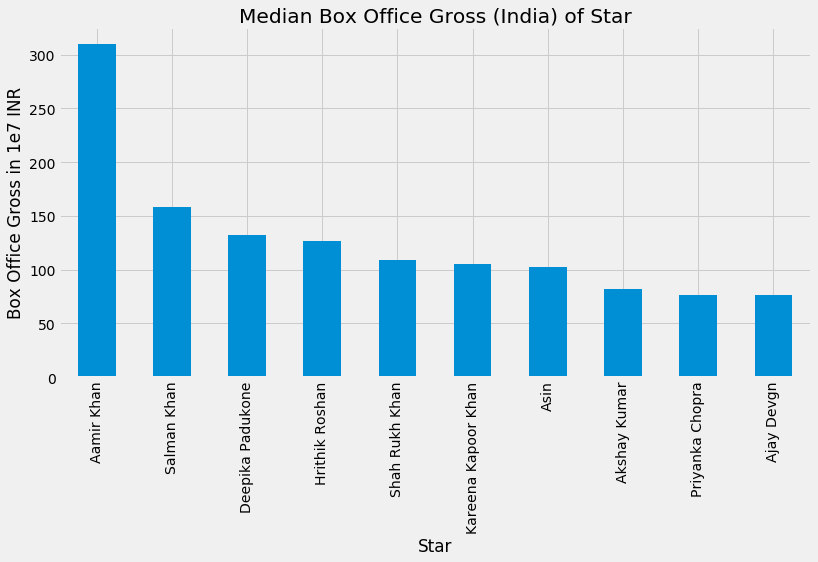

In [189]:
# Median Gross in India
gross_by_established_star_india['Median'].sort_values(ascending=False)[:10].plot.bar()
plt.title('Median Box Office Gross (India) of Star')
plt.xlabel('Star')
plt.ylabel('Box Office Gross in 1e7 INR')
plt.show()

**Aamir Khan** has the highest median value for the Indian box office gross followed by **Salman Khan**